In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

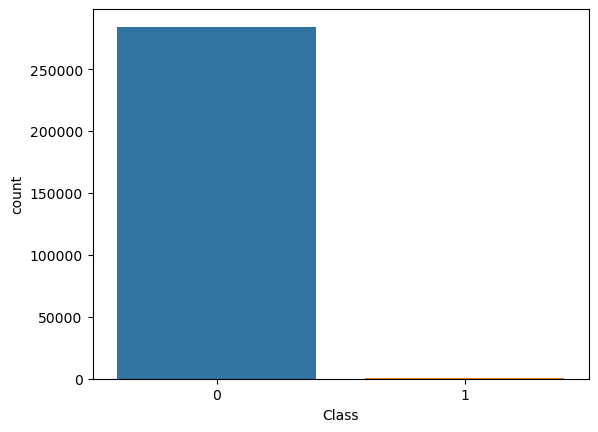

In [8]:
x=credit_card_data['Class']
ax=sns.countplot(x=x,data=credit_card_data)

In [9]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [10]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
legit_sample = legit.sample(n=492)

In [15]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [16]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
269356,163637.0,-0.120552,-0.371136,1.070530,4.186955,5.595383,-2.559278,-7.963081,-2.185503,-0.476500,...,-0.818516,0.187377,-9.478320,0.100900,-3.741618,-0.313581,0.867778,0.791817,1.00,0
203913,135029.0,-0.647916,0.288177,0.091078,-0.524642,-2.155561,0.282298,1.518507,0.112591,0.199106,...,0.283133,0.770114,0.268396,0.023678,-0.531068,0.575683,-0.067357,-0.116190,397.26,0
79411,58015.0,-0.152295,1.429295,-0.106554,0.977445,0.052228,-1.192056,0.653749,0.157014,-0.701334,...,0.175178,0.602273,0.062768,0.396715,-0.685921,-0.412855,0.315505,0.168351,1.50,0
62298,50218.0,1.133963,-0.127570,0.592740,0.895993,-0.685885,-0.460257,-0.181356,0.069963,0.682046,...,-0.192043,-0.452574,0.088432,0.401167,0.277035,0.282004,-0.019082,0.012154,22.79,0
95896,65515.0,-1.171819,0.763205,0.791302,0.918164,0.938821,0.278233,0.153380,0.631945,-0.914160,...,-0.390579,-1.574228,-0.092811,-1.426488,0.125673,-0.541364,-0.036429,-0.081575,20.00,0


In [17]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [18]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [19]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93368.750000,-0.082422,0.052220,-0.034524,0.032166,0.008466,0.037077,-0.103738,0.009948,-0.080313,...,-0.040181,-0.007433,-0.014614,-0.024858,-0.001699,-0.013825,0.001749,0.003132,0.002878,82.281565
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [20]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [21]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
269356  163637.0 -0.120552 -0.371136  1.070530  4.186955  5.595383 -2.559278   
203913  135029.0 -0.647916  0.288177  0.091078 -0.524642 -2.155561  0.282298   
79411    58015.0 -0.152295  1.429295 -0.106554  0.977445  0.052228 -1.192056   
62298    50218.0  1.133963 -0.127570  0.592740  0.895993 -0.685885 -0.460257   
95896    65515.0 -1.171819  0.763205  0.791302  0.918164  0.938821  0.278233   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [22]:
print(Y)

269356    0
203913    0
79411     0
62298     0
95896     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train, Y_train)

LogisticRegression()

In [27]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [28]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9377382465057179


In [29]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
print('Accuracy score on Test Data : ', test_data_accuracy)
print(classification_report(Y_test, X_test_prediction))

Accuracy score on Test Data :  0.9238578680203046
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        99
           1       0.94      0.91      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



In [31]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [32]:
from xgboost import XGBClassifier

In [33]:
xgb_model=XGBClassifier(learning_rate=0.1,n_estimators=50)

In [34]:
xgb_model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
y_predict=xgb_model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [37]:
print(confusion_matrix(Y_test,y_predict))

[[95  4]
 [14 84]]


In [38]:
print(accuracy_score(Y_test,y_predict))
print(classification_report(Y_test, y_predict))

0.9086294416243654
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        99
           1       0.95      0.86      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



In [39]:
from sklearn.svm import SVC

In [40]:
svc_model=SVC()
svc_model.fit(X_train,Y_train)

SVC()

In [41]:
prediction=svc_model.predict(X_test)

In [42]:
print(prediction)

[0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0
 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0
 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1
 1 0 1 0 1 0 0 1 1 1 1 1]


In [43]:
from sklearn import metrics
acc=round(metrics.accuracy_score(Y_test,prediction)*100,2)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.53      0.47      0.50        99
           1       0.52      0.57      0.54        98

    accuracy                           0.52       197
   macro avg       0.52      0.52      0.52       197
weighted avg       0.52      0.52      0.52       197



In [44]:
print(acc)

52.28


In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
dt=RandomForestClassifier()

In [47]:
dt.fit(X_train,Y_train)

RandomForestClassifier()

In [48]:
prediction=dt.predict(X_test)
print(prediction)

[1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 0 1 1 1 0]


In [49]:
acc1=round(metrics.accuracy_score(Y_test,prediction)*100,2)
print("accuracy",acc1)
print(classification_report(Y_test, prediction))

accuracy 91.37
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        99
           1       0.97      0.86      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



In [50]:
import matplotlib.pyplot as plt

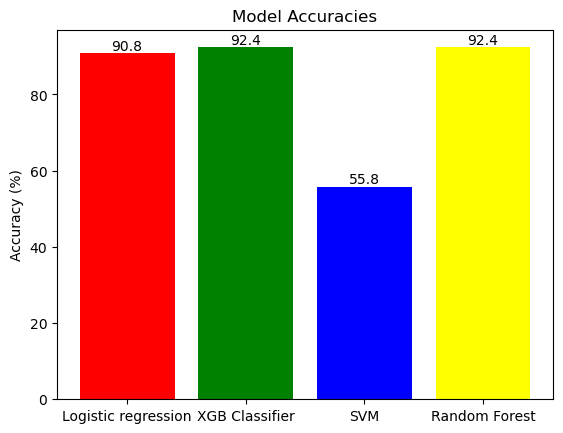

In [51]:
bars = ['Logistic regression', 'XGB Classifier', 'SVM', 'Random Forest']
values = [90.8,92.38,55.84,92.39]
bar_chart=plt.bar(bars, values, color=["red", "green", "blue", "yellow"])
plt.title('Model Accuracies')
plt.ylabel('Accuracy (%)')
for bar in bar_chart:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.show()

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.236895 -0.219752  0.146033 -0.211679  0.275834  0.085599   
V1      0.236895  1.000000 -0.803059  0.876612 -0.608357  0.861982  0.325368   
V2     -0.219752 -0.803059  1.000000 -0.860601  0.682109 -0.804403 -0.289487   
V3      0.146033  0.876612 -0.860601  1.000000 -0.765289  0.858341  0.464892   
V4     -0.211679 -0.608357  0.682109 -0.765289  1.000000 -0.578569 -0.431758   
V5      0.275834  0.861982 -0.804403  0.858341 -0.578569  1.000000  0.308897   
V6      0.085599  0.325368 -0.289487  0.464892 -0.431758  0.308897  1.000000   
V7      0.208632  0.881683 -0.847299  0.888123 -0.706074  0.843635  0.284733   
V8     -0.148661 -0.082575 -0.013209 -0.174741  0.107469 -0.214206 -0.568765   
V9      0.163769  0.649121 -0.698371  0.758241 -0.779492  0.662231  0.370459   
V10     0.216617  0.735276 -0.772606  0.852958 -0.793748  0.763185  0.440561   
V11    -0.305598 -0.523581  0.611335 -0.

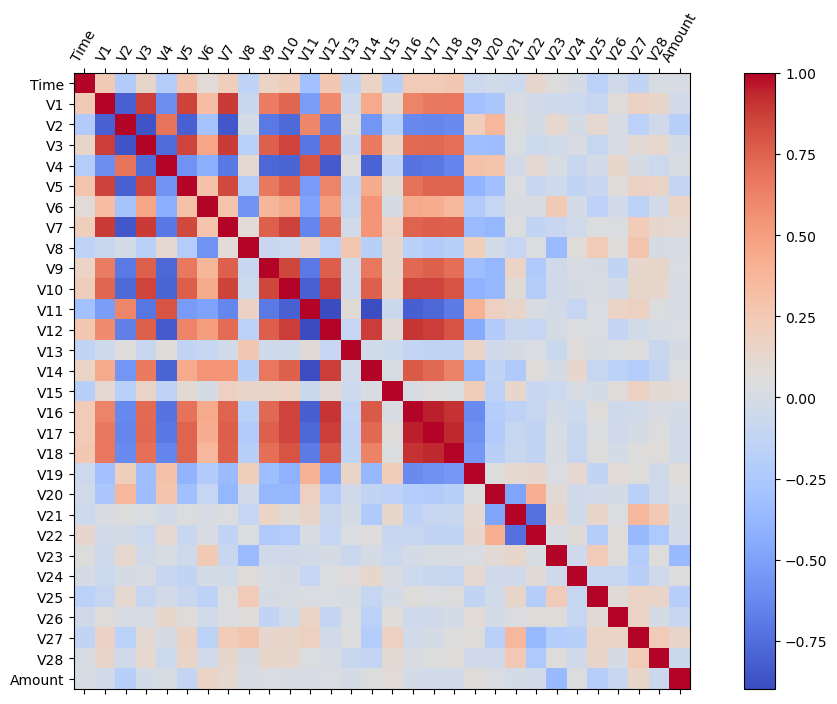

In [52]:
corr_matrix = X.corr()
print(corr_matrix)
fig, ax = plt.subplots(figsize=(14, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=60 )
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.show()

In [53]:
from sklearn.ensemble import VotingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
clf1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
voting_clf = VotingClassifier(estimators=[('xgb', clf1), ('rf', clf2)], voting='soft')
voting_clf.fit(X_train, y_train)
accuracy = voting_clf.score(X_test, y_test)
print(accuracy)



0.9238578680203046


In [54]:
clf1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
voting_clf = VotingClassifier(estimators=[('xgb', clf1), ('rf', clf2)], voting='soft')
voting_clf.fit(X_train, y_train)

# Predict the responses for test dataset
y_pred = voting_clf.predict(X_test)

# Calculating accuracy
accuracy = voting_clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9238578680203046
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        95
           1       0.95      0.90      0.92       102

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



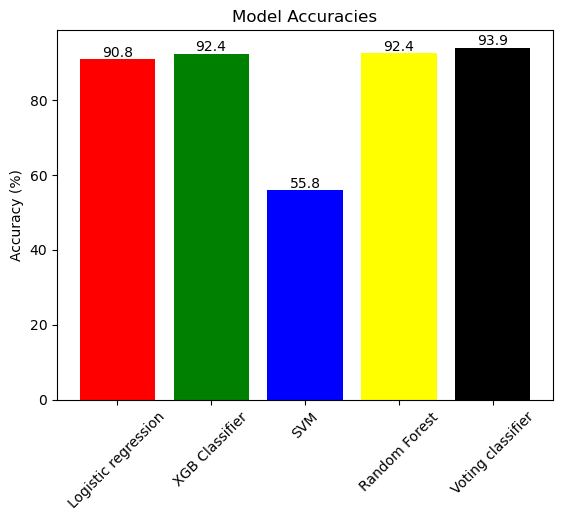

In [55]:
bars = ['Logistic regression', 'XGB Classifier', 'SVM', 'Random Forest','Voting classifier']
values = [90.8,92.38,55.84,92.39,93.9]
bar_chart=plt.bar(bars, values, color=["red", "green", "blue", "yellow", "black"])
plt.title('Model Accuracies')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
for bar in bar_chart:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')
plt.show()